In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 線性迴歸

$$f(x) = 1.2x + 0.8 + \varepsilon$$

In [4]:
x = np.linspace(0, 6, 300)
y = 1.2*x + 0.8 + 0.4 * np.random.randn(300)

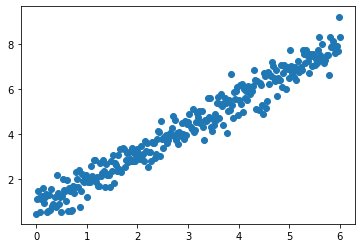

In [5]:
plt.scatter(x, y)

### AI 三步驟

* 打造函數學習機
* fit
* predict

In [7]:
from sklearn.model_selection import train_test_split

x = $[x_0, x_1, \ldots, x_k]$

x = $[[x_0], [x_1], \ldots, [x_k]]$


In [10]:
len(x)

300

In [11]:
x.shape

(300,)

In [13]:
X = x.reshape(len(x), 1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

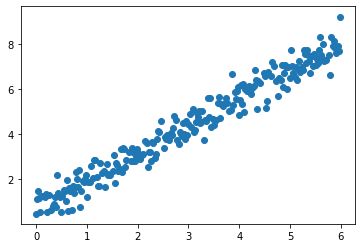

In [15]:
plt.scatter(x_train, y_train)

### step1. 打造函數學習機

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regr = LinearRegression()

### step2. fit

In [18]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### step3. predict

In [19]:
regr.predict([[0.9487]])

array([1.87104834])

In [20]:
Ypred = regr.predict(x_test)

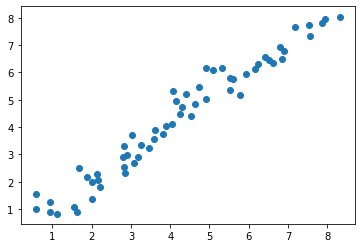

In [23]:
plt.scatter(y_test, Ypred)

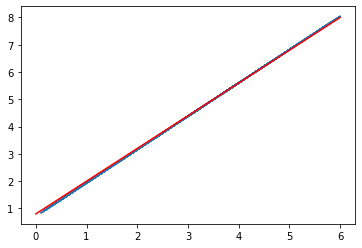

In [26]:
plt.plot(x_test, Ypred)
plt.plot(x, 1.2*x + 0.8, 'r')

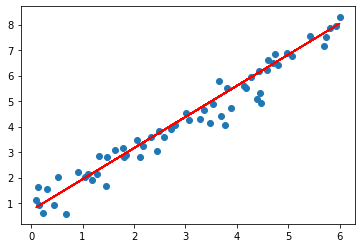

In [28]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Ypred, 'r')

### 用神秘的 seaborn

In [29]:
import seaborn as sns

In [30]:
sns.set()

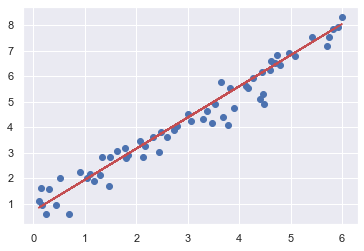

In [34]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Ypred, 'r')

### Boston 房價預測

In [35]:
from sklearn.datasets import load_boston

In [36]:
boston_dataset = load_boston()

In [37]:
# boston_dataset.data
# boston_dataset.target

In [38]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [39]:
boston = pd.DataFrame(boston_dataset.data,
                     columns = boston_dataset.feature_names)

In [40]:
len(boston)

506

In [41]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
boston["MEDV"] = boston_dataset.target

In [43]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


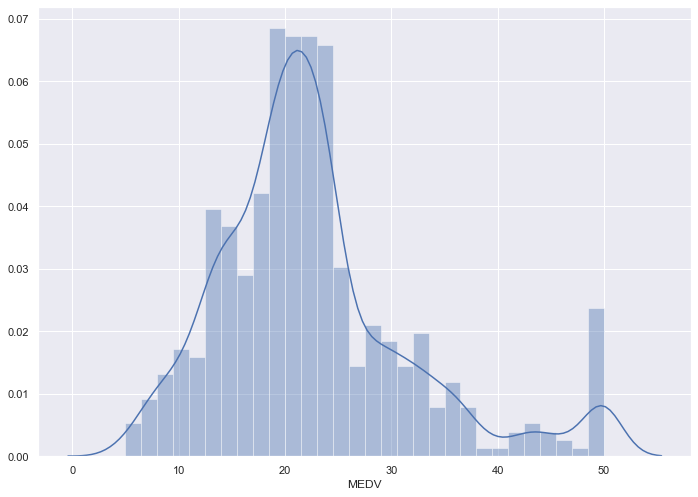

In [44]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.distplot(boston.MEDV, bins=30)

In [45]:
correlation_matrix = boston.corr().round(2)

In [46]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


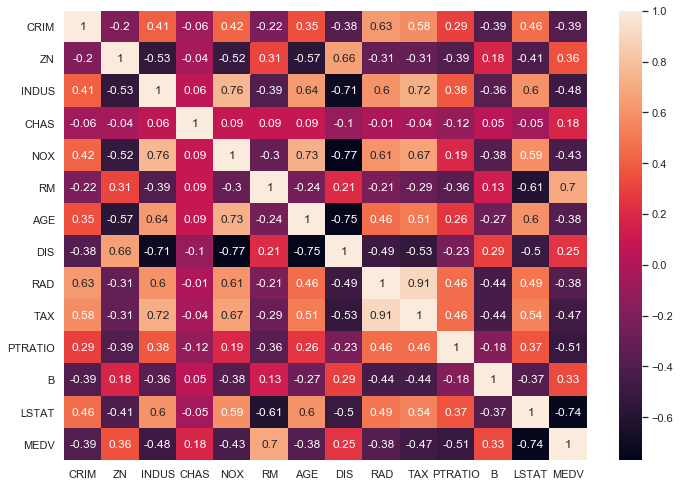

In [47]:
sns.heatmap(correlation_matrix, annot=True)

In [48]:
X = boston.loc[:, "CRIM":"LSTAT"].values
Y = boston.MEDV

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=0)

### step1. 打造函數學習機

In [50]:
regr = LinearRegression()

### step2. fit

In [51]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### step3. predict

In [52]:
y_pred = regr.predict(x_test)

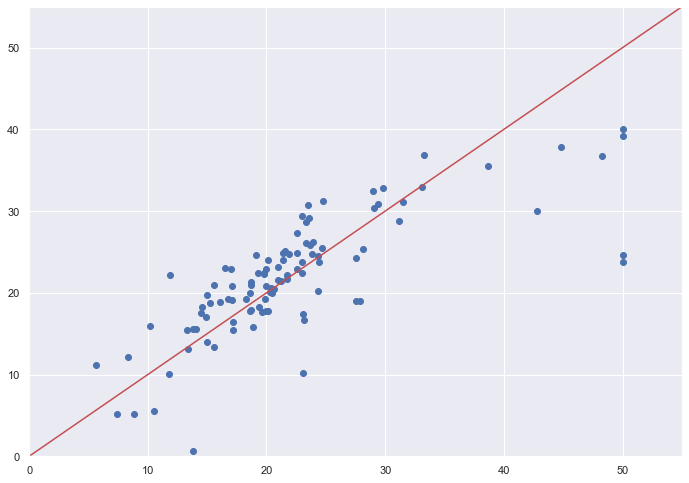

In [53]:
plt.scatter(y_test, y_pred)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0,55], [0, 55], 'r')